 # <font color=navy> Cleaning Data for Analysis using Python </font>

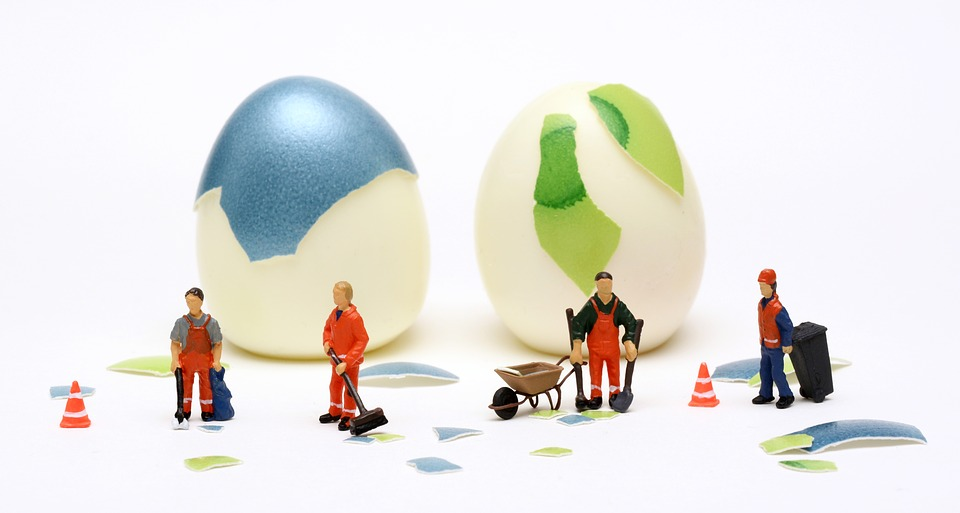
image from Pixabay.com

##  <font color=navy> Introductory steps to cleaning a dataset for analysis </font>
This is describing the steps for cleaning data as if you have very little (or no) experience using Python. There are faster and easier ways to do some of these steps, but the purpose of each step is to walk you through what the code means as you do it using basic concepts.

> To be clear...cleaning data is rarely the linear process shown here. This outline is solely to keep it simple as we move through the data. It's much more common to jump around between steps as you work with the data. 

For this cleaning exercise, data for the Marvel Universe movies will be reviewed and tidied up to perform analysis.  
Data downloaded from Kaggle: https://www.kaggle.com/promptcloud/all-marvel-cinematic-universe-movies-on-imdb

##  <font color=navy> Items to Consider</font>
***
Exploratory data analysis is the first dive into a new dataset to discover the secrets within. Common starting points to cover:
1. What question are you trying to answer? Are you trying to prove (or disprove) something?
2. What type of data do you have? (categorical, numerical, text with numbers)
3. Are there missing data or incomplete data? If so, how do you deal with it?
4. Do you need to add, delete or change information in columns to make it more useful?
5. Are there outliers? How will you handle them?

## <font color=navy> Table of Contents </font>
<a id = 'sections'></a>

1. [Importing Libraries](#importing_libraries)
2. [Importing Files](#importing_files)
3. [Displaying Data](#Displaying_data)
4. [Replacing Characters](#Replacing_Characters)
5. [Replacing Missing Values](#replace_missing)
6. [Changing Data Types](#Change_dtype)
7. [Deleting Columns](#deleting_columns)
8. [Deleting Rows](#deleting_rows)
9. [Replace Values based on other columns](#replace_value)
10. [Renaming Columns](#rename_columns)
11. [Reordering the Columns](#reorder_columns)
12. [Creating Calculated Columns](#create_calculated)
13. [Converting the Date Column to Year](#convert_date)
14. [Sorting Data](#sort_data)
15. [Filter Rows to Make a New Dataset](#create_new)
16. [Create Plots to Check the Data](#create_plots)
17. [Summarize with Pandas Profiling](#pandas_profile)

###  <font color=navy>1. Importing Libraries </font>
<a id = 'importing_libraries'></a>
***
<t> First, we will import the libraries we want to use. As a rule of thumb, the libraries are imported at the beginning of the code. If you need to import more libraries as you go, come back and add at the beginning.
You can assign a friendly name to the packages you install to make it easier to read the code and to reduce typing. You can use your own, but there are some that are commonly used, such as __import pandas as pd__.
***
If you need to install packages, add a new cell above your import cell.  
Use the command <font color=green> !pip install _name of package_. </font>  Be sure to comment out the code after you run it the first time so that it doesn't provide an error message when you re-run the cell.
> _Comments in code are added by inserting <font color=teal> __#__ </font> in front of the code. When the code runs, it will ignore everything in the line following the #._
    
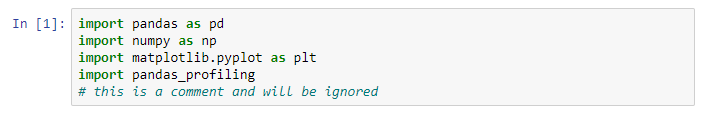

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
# this is a comment and will be ignored

[Return to Table of Contents](#sections)

###  <font color=navy>2. Importing Files </font>
<a id = 'importing_files'></a>
******
To import a file (called "read"), you can assign the file a variable name and then use one of the following commands to read the data.

Importing files will require the Pandas package to be imported into the Notebook.

<font color=green>__import__</font> pandas <font color=green>__as__</font> pd

***
If the data is saved in a folder in the same Path as your Jupyter Notebook, you can use the folder name/file name to get the file

mydata = pd.read_csv('datasets/imdb_marvel.csv')
***
If the file is stored elsewhere on your computer, you need to prefix the file path with the letter "r" to let Python understand the location using the current backslash file path.

__my_data = pd.read_csv(r"C:\Users\Name\Desktop\FolderName\Data.csv")__

There is the option to manually replace all the backslashes with forward slashes to open the file (but it's more work).

__my_data = pd.read_csv("C:/Users/Name/Desktop/FolderName/Data.csv")__
***

>_This file has been saved in the same working directory as Jupyter Notebook, so it can be called with an abbreviated file path. If this was saved in another folder, you would have to call it specifically with the correct file path._

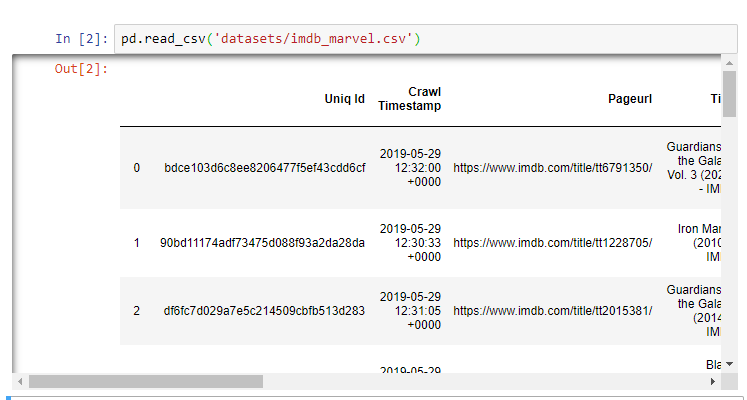

Enter in code to open the dataset

In [3]:
pd.read_csv('datasets/imdb_marvel.csv')

,Uniq Id,Crawl Timestamp,Pageurl,Title,Genres,Release Date,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection,Collection Date
0,bdce103d6c8ee8206477f5ef43cdd6cf,2019-05-29 12:32:00 +0000,https://www.imdb.com/title/tt6791350/,Guardians of the Galaxy Vol. 3 (2021) - IMDb,NaN,NaN,NaN,NaN,NaN,Directed by James Gunn. With Elizabeth Debicki...,NaN,English,NaN,NaN,NaN,NaN
1,90bd11174adf73475d088f93a2da28da,2019-05-29 12:30:33 +0000,https://www.imdb.com/title/tt1228705/,Iron Man 2 (2010) - IMDb,Action|Adventure|Sci-Fi,7 May 2010 (USA),PG-13,7.0,124 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Mickey Rourke|Gwyneth Paltro...,English|French|Russian,"D.C. Stages, 1360 East 6th Street, Downtown, L...","$200,000,000","$623,933,331,",19 August 2010
2,df6fc7d029a7e5c214509cbfb513d283,2019-05-29 12:31:05 +0000,https://www.imdb.com/title/tt2015381/,Guardians of the Galaxy (2014) - IMDb,Action|Adventure|Comedy|Sci-Fi,1 August 2014 (USA),PG-13,8.1,121 min,"Directed by James Gunn. With Chris Pratt, Vin ...",Chris Pratt|Vin Diesel|Bradley Cooper|Zoe Saldana,English,"Shepperton Studios, Shepperton, Surrey, Englan...","$170,000,000","$774,176,600",NaN
3,4f73f64a1b559ac76448fd9347bca974,2019-05-29 12:31:37 +0000,https://www.imdb.com/title/tt1825683/,Black Panther (2018) - IMDb,Action|Adventure|Sci-Fi,16 February 2018 (USA),PG-13,7.3,134 min,Directed by Ryan Coogler. With Chadwick Bosema...,Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,English|Swahili|Nama|Xhosa|Korean,"Pinewood Atlanta Studios, 461 Sandy Creek Road...","$200,000,000","$1,347,071,259",NaN
4,35ced81a516bc02c3f303015cb7a068f,2019-05-29 12:30:49 +0000,https://www.imdb.com/title/tt1300854/,Iron Man 3 (2013) - IMDb,Action|Adventure|Sci-Fi,3 May 2013 (USA),PG-13,7.2,130 min,Directed by Shane Black. With Robert Downey Jr...,Robert Downey Jr.|Guy Pearce|Gwyneth Paltrow|D...,English,"Cary, North Carolina, USA","$200,000,000","$1,215,439,994",NaN
5,1b678fd492c4e7e9670d9821771d4969,2019-05-29 12:30:25 +0000,https://www.imdb.com/title/tt0800080/,The Incredible Hulk (2008) - IMDb,Action|Adventure|Sci-Fi,13 June 2008 (USA),PG-13,6.7,112 min,Directed by Louis Leterrier. With Edward Norto...,Edward Norton|Liv Tyler|Tim Roth|William Hurt,English|Portuguese|Spanish,"Cherry Street Bridge, Toronto, Ontario, Canada","$150,000,000","$263,427,551",NaN
6,430d1d4ab49d0606c260e17b0dc0bb93,2019-05-29 12:31:49 +0000,https://www.imdb.com/title/tt4154664/,Captain Marvel (2019) - IMDb,Action|Adventure|Sci-Fi,8 March 2019 (USA),PG-13,7.1,123 min,"Directed by Anna Boden, Ryan Fleck. With Brie ...",Brie Larson|Samuel L. Jackson|Ben Mendelsohn|J...,English,"Los Angeles, California, USA",NaN,"$1,126,318,317,",20 May 2019
7,c71e93e0f4eb6e5cd73137f051262007,2019-05-29 12:30:21 +0000,https://www.imdb.com/title/tt0371746/,Iron Man (2008) - IMDb,Action|Adventure|Sci-Fi,2 May 2008 (USA),PG-13,7.9,126 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Gwyneth Paltrow|Terrence How...,English|Persian|Urdu|Arabic|Hungarian,"Palmdale Regional Airport, Palmdale, Californi...","$140,000,000","$585,174,222,",2 October 2008
8,f59d540280f7a915c1823908ff695e14,2019-05-29 12:30:38 +0000,https://www.imdb.com/title/tt0800369/,Thor (2011) - IMDb,Action|Adventure|Fantasy|Sci-Fi,6 May 2011 (USA),PG-13,7.0,115 min,Directed by Kenneth Branagh. With Chris Hemswo...,Chris Hemsworth|Anthony Hopkins|Natalie Portma...,English,"Galisteo, New Mexico, USA","$150,000,000","$449,326,618",NaN
9,26f5c6056bfbbfe50d427cd97845c899,2019-05-29 12:31:19 +0000,https://www.imdb.com/title/tt3498820/,Captain America: Civil War (2016) - IMDb,Action|Adventure|Sci-Fi,6 May 2016 (USA),PG-13,7.8,147 min,"Directed by Anthony Russo, Joe Russo. With Chr...",Chris Evans|Robert Downey Jr.|Scarlett Johanss...,English|German|Xhosa|Russian|Romanian|Hindi,"Atlanta, Georgia, USA","$250,000,000","$1,153,304,495",NaN


You should have 24 rows and 16 columns (plus the row index column). If you can't see all the rows, you can double-click on the white space to the left of the data frame to expand the table.  

Let's assign the data to a variable called __marvel__. This will make it simple to call and do analysis.
  
__Assign the data to a variable:__  
marvel <font color = purple>=</font> pd.read_csv<font color = green>(</font> <font color=darkred>'datasets/imdb_marvel.csv'</font><font color = green>)</font>

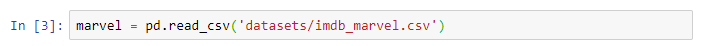
> _Note: most code you will see online will name the dataset __df__ (for dataframe). To keep the dataframe clear from the other namespaces we are using (such as pd.read or str.len) I've chosen to name the dataframe "marvel" instead of using "df"._

Nothing showed up this time, and that is exactly what we were expecting! We want the data stored so we can pull the information as we want it.

[Return to Table of Contents](#sections)

 ###  <font color=navy>3. Displaying Data </font>
 <a id = 'Displaying_data'></a>
 *** 
To start with, let's explore the top section of the data, or the Head. 
  
Using the command <font color = green> __.head()__ </font> will display the top 5 rows of data.   
Inserting a number into the brackets will bring up that many rows [ie. <font color = green> __.head(10)__ </font>].

Feel free to insert numbers into the brackets and re-run the cell multiple times to see the different results.

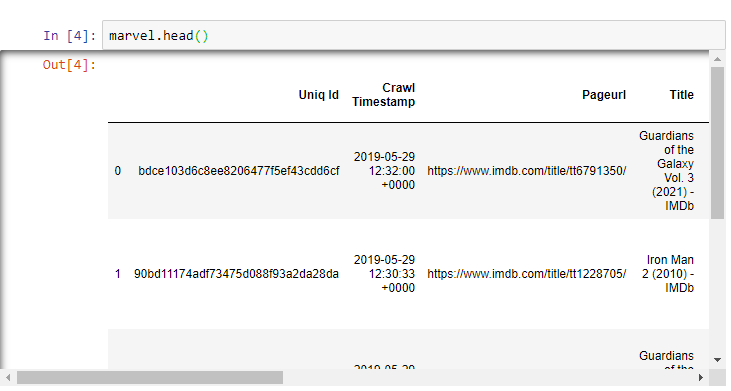

> _You might have noticed the first row is labeled as 0.  If you call 5 rows, you will see rows 0,1,2,3,4.  
Python is a zero-based index system - keep this in mind when working with row or column index numbers._

We can also explore the bottom of the data using the Tail command. 
  
Using the command <font color = green> __.tail()__ </font> will display the bottom 5 rows of data.   
Inserting a number into the brackets will bring up that many rows [ie. <font color = green> __.tail(20)__ </font>].

Feel free to insert numbers into the brackets and re-run the cell multiple times to see the different results.
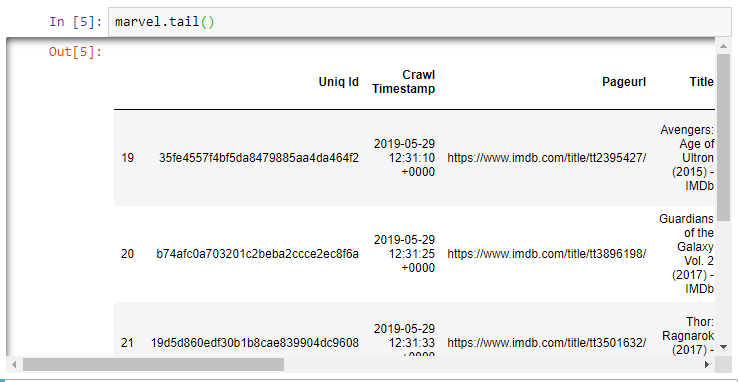

We can use <font color=green>__.shape__ </font>to tell us the number of rows and columns in the date.
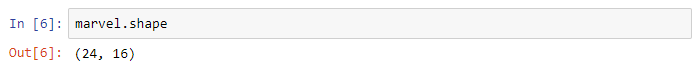

There are 24 rows and 16 columns in this dataset. We are working with a small dataset to keep processing time to a minimum and to make it easier to clean the data.
***
We can also call up the info for each column using<font color=green> __.info()__</font>.
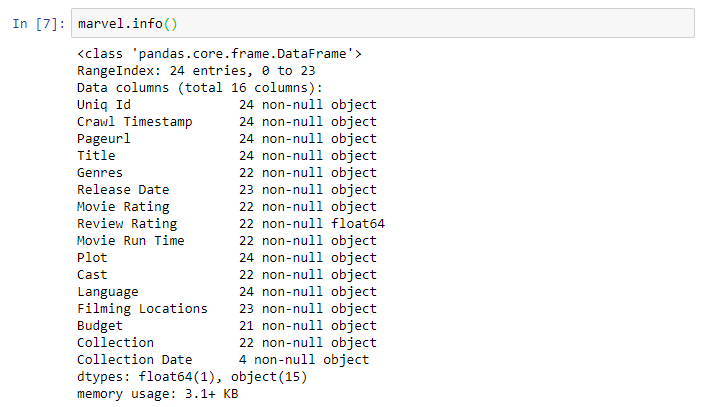

This provides a summary of the information in each column. Reading the info tell us:
 * RangeIndex = 24 entries (24 rows), indexed 0 to 23 [ _that's the zero-index at work_ ]
 * Data columns = 16 columns in total
 * First column is __Uniq Id__. It has 24 non-null rows (or there are no empty or null rows). The date type is "object"
 * dtypes are 1 @ float64 and 15 @ object 

[Return to Table of Contents](#sections)

 ###  <font color=navy>4. Replacing Characters </font>
 <a id = 'Replacing_Characters'></a>
***
Based on the amount of information in each row, it can be difficult to get a view of the data within a column.  
We can get a summary of the information in any column by using <font color = green>__[ _column name_ ].describe()__</font>.  
Let's view the information in the __Review Rating__ column, since it's the only column with numbers.
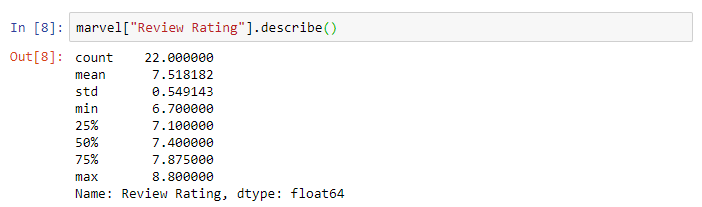
> Note that if you don't use the <font color=green>__()__ </font> after describe, it will return all the data in that column in an offset list.

The last line of the summary indicates the Name (of the column) and the __dtype__ or data type, which is __float64__ _(also called double or decimal number)_.

We've been provided with a mathematical summary of the numbers in the Review Rating column because the data type is numeric.

Let's try the same thing with __Budget__ and see if we get the same mathematical summary.

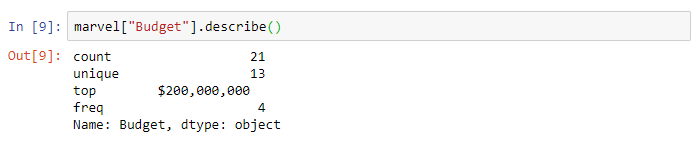

This isn't what was expected! 
Looking at the last line, we can see the dtype is __object__. The values are registering as string or mixed type (numeric and non-numeric). This means we cannot do math on the numbers as they are currently stored. 

We should look at the data types for all the columns and figure out what needs to be changed.
<font color=green>__.dtypes__</font> will show the data types of each column. 

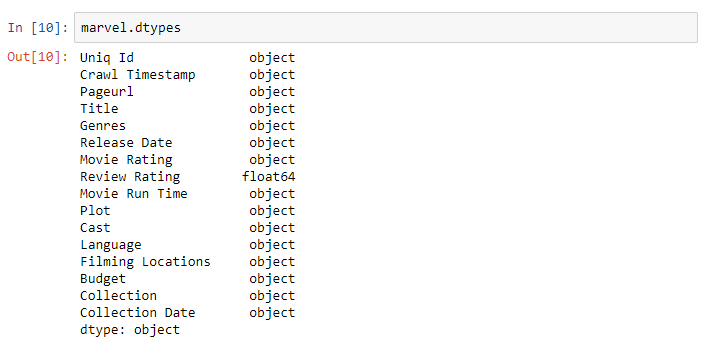

That is a lot of object types - even though some columns clearly have numerical values.  In order to convert the data types on the numerical columns, we will have to tidy up the extra characters and null values.

Let's start with the __Budget__ and __Collection__ columns. 
To do this, we will first need to drop the dollar sign from the numbers.  
We are searching the strings (since it's text and numbers right now) and replacing the __$__ with nothing.
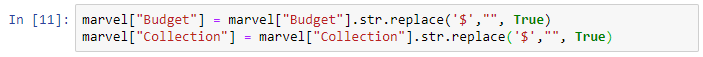

Display the top 5 rows again to see if it worked. Since Budget and Column are side by side, using<font color=green> __.loc__ </font>allows us to pull just the two columns we want.  
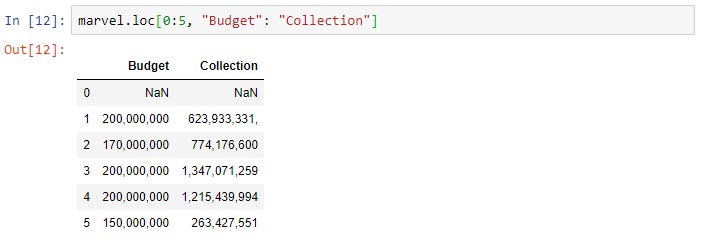

Dollar signs are gone, but now I see an extra comma in the first row of __Collection__!
Luckily, removing the commas will not affect the number value once we convert to an integer. We will go ahead and remove all the commas.
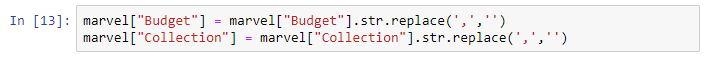

Let's check the Budget and Collection columns again.
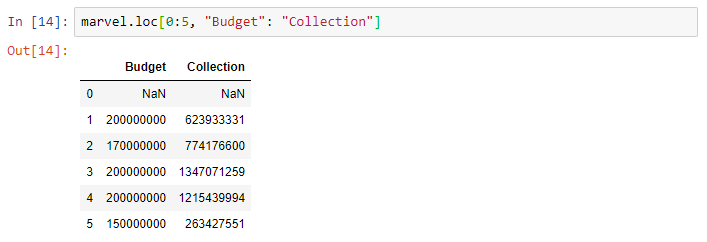

Now let's tackle the Release Date column, which should be showing as a date column.
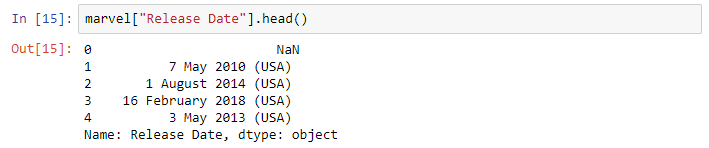

This time there is text with the date. We will have to remove the text to convert to a date.
> _if the information was not the same for every date, we could look to split the columns and extract the information, but in this case, it's not valuable for analysis_

This time we will use a lambda function to remove the last 6 characters from each string in the column. " (USA)"

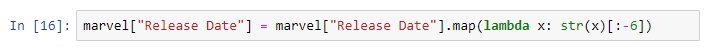

Check the top 5 rows again.
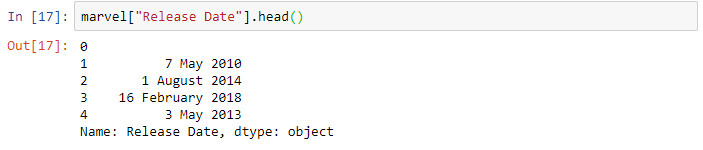

Take a look at the Title column.
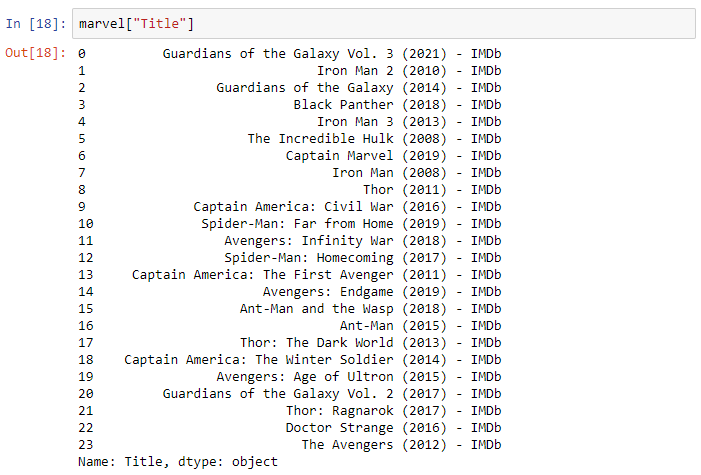

Similar to the Release Date, it has duplicated and unnecessary information with the title. Let's drop the last 14 characters to remove the date and " - IMBb".

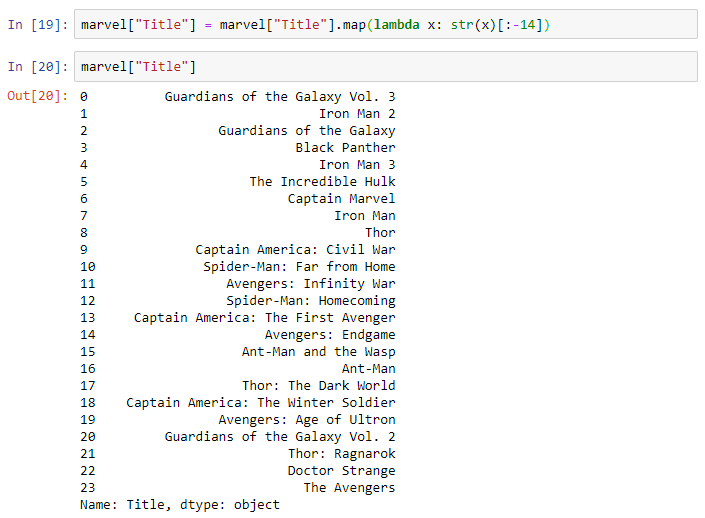

In [ ]:
marvel["Title"] = marvel["Title"].map(lambda x: str(x)[:-14])

In [ ]:
marvel["Title"]

That is much easier to read!  

Let's review the data summary in the Plot column again.
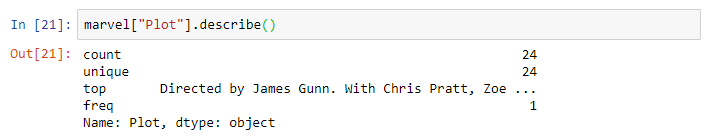

Count of 24 rows and 24 unique rows....
Let's look at the data in detail. Maybe if we look at the length of each string.
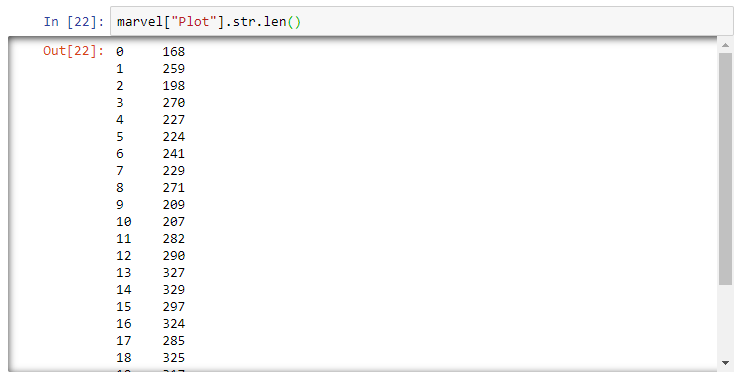

That is just too much information. Let's see if we can find a pattern.

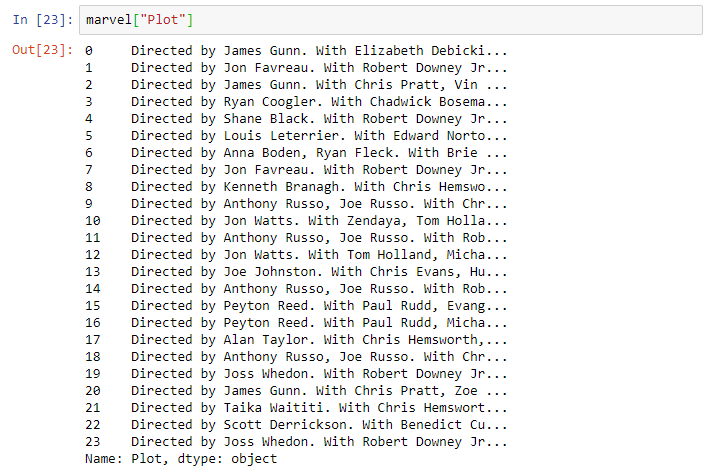

Most of this information is not very useful. The list of actors for each film are listed in a separate column and we will not be doing analysis on the plot storyline. There is one unique piece of information in here, which is the name of the director.
Let's create a new column for the Director. 

We can do this in two steps. First we will create a new column extract the text from the Plot column before the first period.
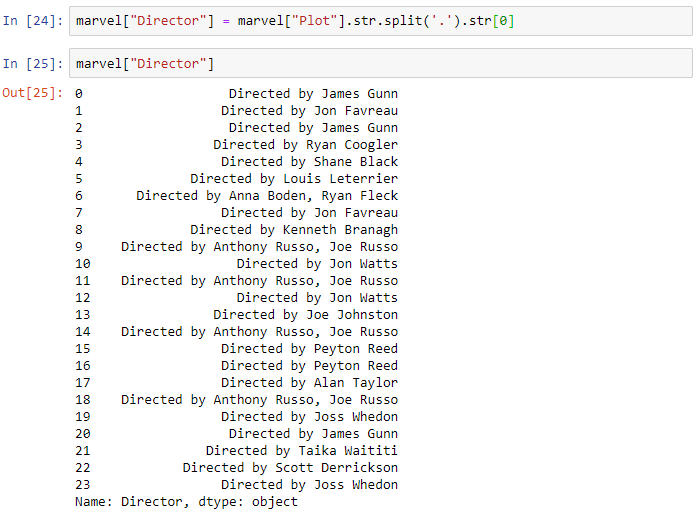

Part one completed! Now to remove the extra text at the front of each string.
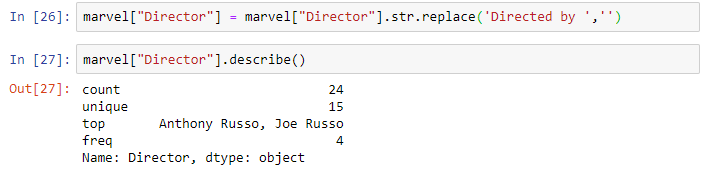

While we removing extra text, let's also remove the "min" from the Movie Run Time. Once it's converted to numbers, we can do mathematical caluculations on the column.  
Let's filter the column for anything that contains "min".
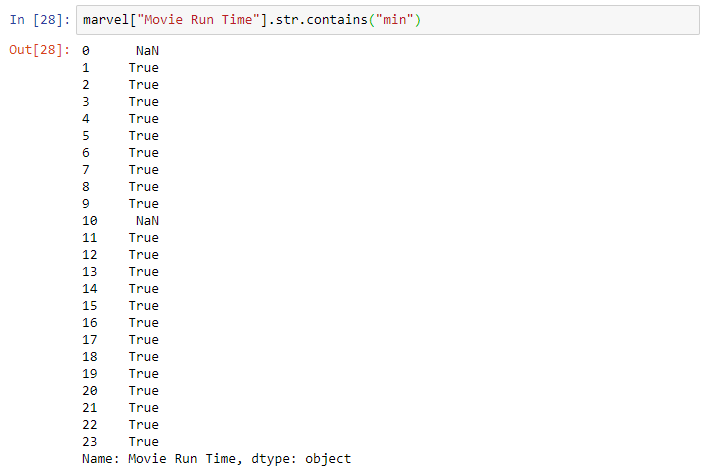

We can see there are two values: NaN and True. We could also get a summary of the rows that return as containing "min" by adding <font color=green> __.sum()__ </font> on the end.
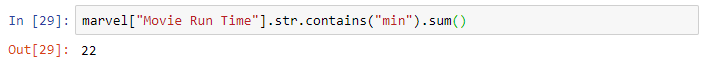

In [ ]:
marvel["Movie Run Time"].str.contains("min").sum()

Now that we have confirmed that all the row which have times are in minutes, we can go ahead and remove the text. This time it's 4 characters to remove, the "min" plus the space.

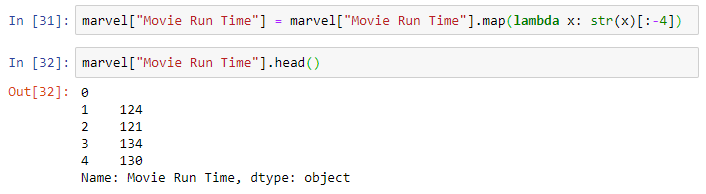

_Notice how row 0 has been converted from __NaN__ to empty? 

[Return to Table of Contents](#sections)

### <font color=navy>5. Replacing Missing Values </font>
<a id = 'replace_missing'></a>
***
I noticed some NaN values in the columns. Let's get a count of how many null values are in each of the columns.  
<font color=green>__.isnull().sum()__ </font>will sum the instances of null values per column.
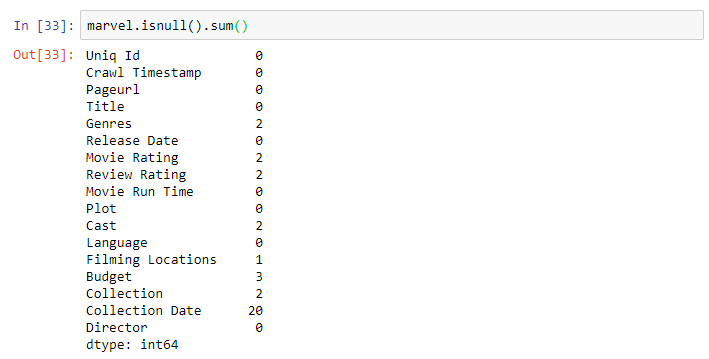

There are quite a few null values, __NaN__ (Not a Number), which we will have to decide how to manage. Our options are:
 * replace with 0
 * delete the row
 * impute the missing data with the mean for that column
 * determine if the value can be calculated from another column  
 
What you choose to for each column will vary, depending on the data type and the column's usefulness.  

Let's start with the Budget and Collection columns. They both appear to be showing currency, so we will need to convert the __NaN__ in order to change the data type later.

Since Budget and Column are side by side, using <font color=green>__.loc__ </font>allows us to pull just the two columns we want to view.  
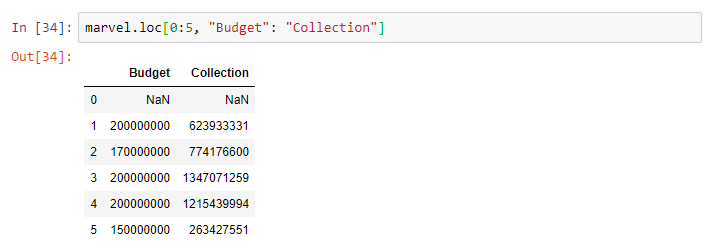

Definately NaN values in both columns!
Using <font color=green>__.fillna()__ </font>will replace the null values with the value of our choosing. The value entered into the brackets will replace the NaN values, in this case, 0.

We are assigning the column names as the variable to the expression so that the column values are replaced going forward.
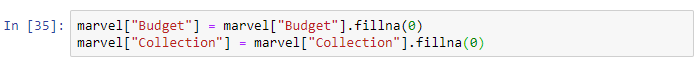

Use the count of the null values on the columns to confirm it is changed.
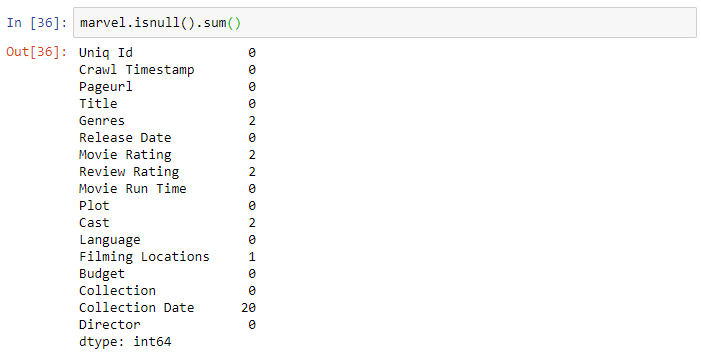

[Return to Table of Contents](#sections)

 ###  <font color=navy>6. Changing Data Types </font>
 <a id = 'Change_dtype'></a>
 ***
Start by calling the display of the data type for each column.
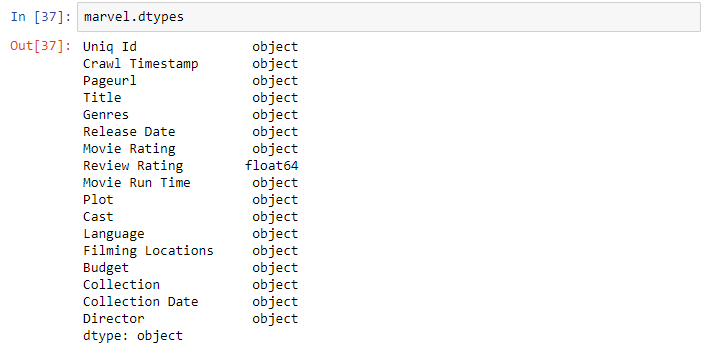

Now that only numbers remain in our currency columns, let's start by changing the type to integers.

We will use <font color=green>__pd.to_numeric__</font> to change each of the columns. 
Using <font color=green>downcast='integer'</font> means we want the text converted to an integer (it will decide on size int32 or int64 based on the values).
We have already cleaned up our text values in the numerical columns and handled our NaN values, so we set errors='ignore'.
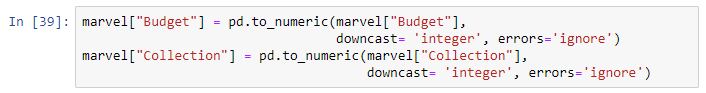

That should do it. Let's check the dtypes.
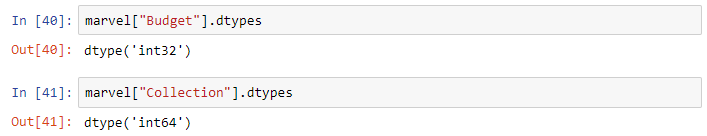

Awesome! We have the columns converted to int32 and int 64. One more time to check the columns.
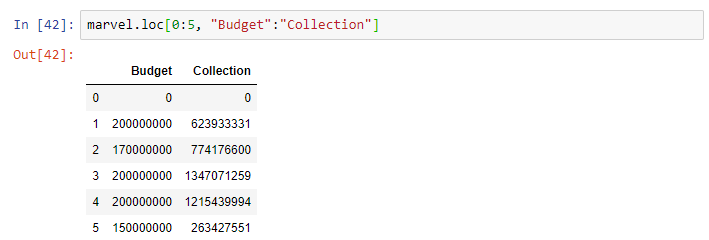

We also want to change the "Movie Run Time" to an integer. This time errors='coerce' to input NaN if anything can't be converted to an integer.
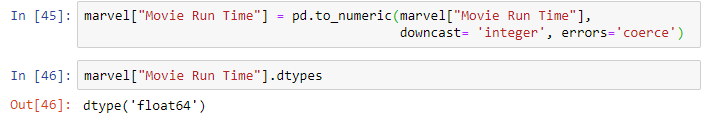

And finally, let's cast the Release Date column into date format.  
This time we use <font color=green>__to_datetime__ </font>and use <font color=green>__infer_datetime_format=True__</font>, allowing the system to sort out the date without specifying a format.
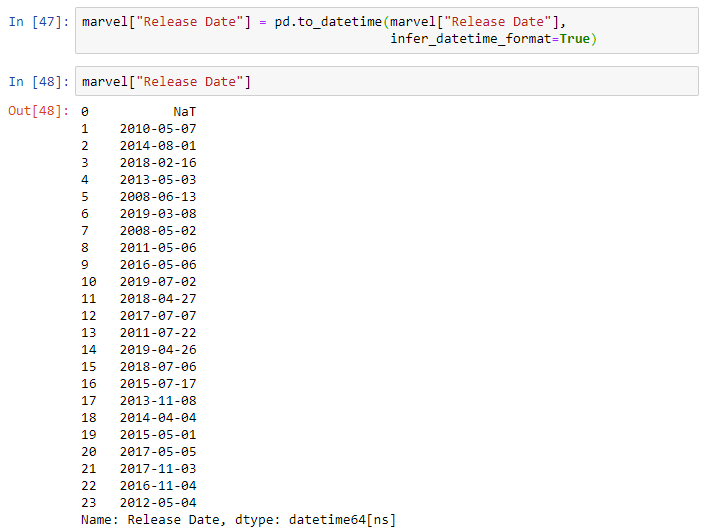

And let's call describe to see how the numbers worked out.
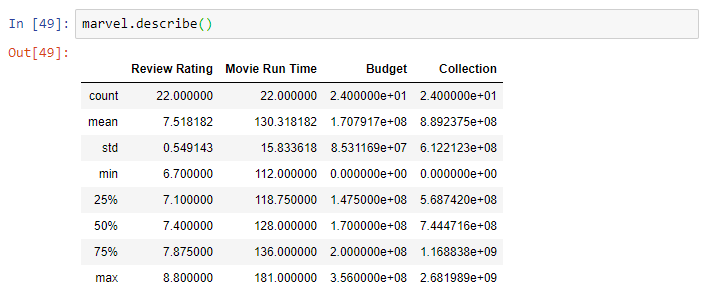

And finally, let's pull up the list of data types by column again.
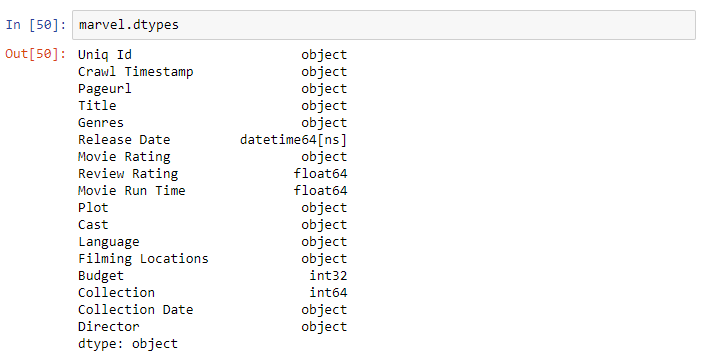

Much better, now we have numerical columns and a date column to use for analysis.  
_Marvel_ (haha) at all the work you've done so far!

[Return to Table of Contents](#sections)

###  <font color=navy>7. Deleting Columns </font>
<a id = 'deleting_columns'></a>
***
Collection Date looked like it has a lot of missing values. Let's double-check. We will check how many rows are null (NaN) and sum the total.
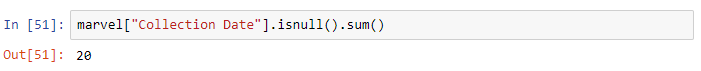

_note: if you use <font color=green>__.isnull().count()__ </font>it will return the count of the entire column, which is not correct._

That is too many null values to make the column useful. Let's drop the column.  
<font color=green>__.drop( _column_, axis = 1)__</font>  OR <font color=green> __.drop( [ _column, column_ ], axis = 1)__</font>
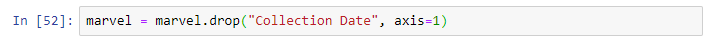

> axis = 0 is rows  
axis = 1 is columns

Let's check the front of our dataset.
Using <font color=green> __.iloc__</font> will use only index numbers instead of column names. Let's check the first 5 rows and the first 9 columns. [Keep in mind that when calling by index, the last number is minus one]
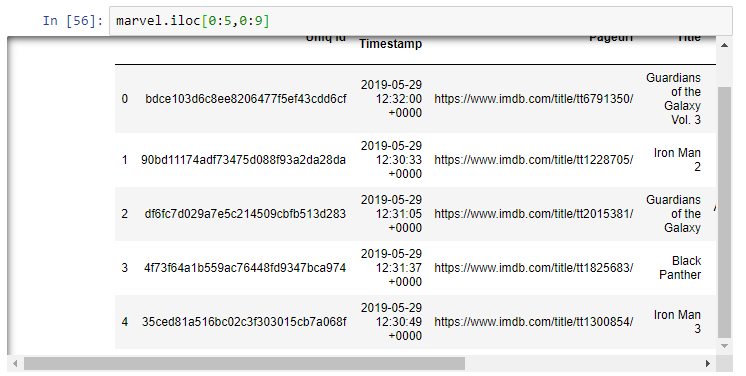

The first three columns are also not very useful, let's drop those too.
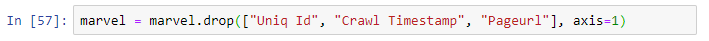

We replaced the useful information from the Plot column with the new Director column, so we can delete that column. We will not use the Filming Locations, Languages, Genres, Cast or Movie Rating columns, so we can drop those too.
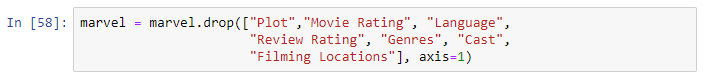

Let's check the dataset again.
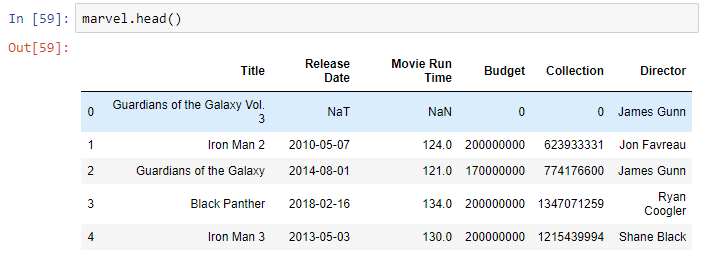

[Return to Table of Contents](#sections)

###  <font color=navy>8. Deleting Rows </font>
<a id = 'deleting_rows'></a>
***
Everything is starting to come together, although the first row of data is full of null values - the movie isn't released yet, so there is not enough information. 
We will drop this row from our data.
Using <font color=green> __.drop__</font> with <font color=green> __.head(1).index__ </font> will drop the first row.
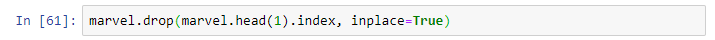

A quick check that we dropped only one row. We started with 24 rows, we should have 23 now.
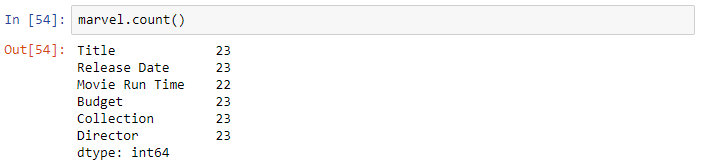

And we check the dataset again.
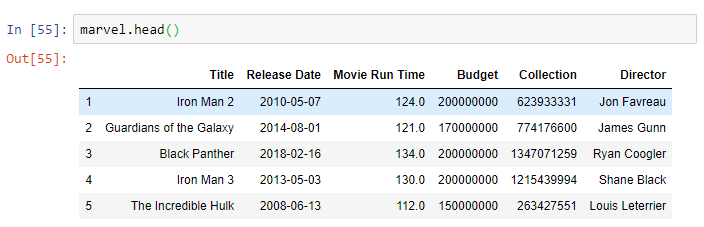

> _Note that the index remains unchanged - Iron Man 2 was index 1 before and after the change._  

One more time to check for null values.
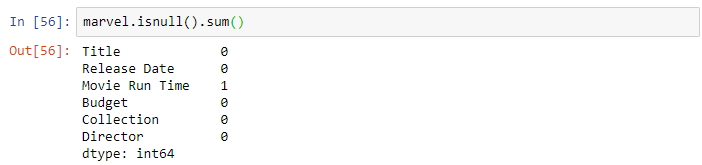

Hmmmm.... one column has a null, let's see if we can find the row with the null value by searching the column Movie Run Time.
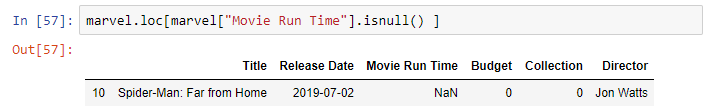

Well this row has the NaN value. We can also see the Budget and Collection columns are 0. We should delete this row from the dataset, as it has no value.

We can use __.dropna__ to drop the null values, specifying the axis as 0 for rows. We are going to specify a subset (the column Movie Run Time) as an extra layer of caution. 
>axis = 0 is rows  
axis = 1 is columns

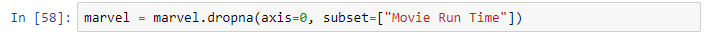

Let's search for nulls in the Movie Run Time column again.
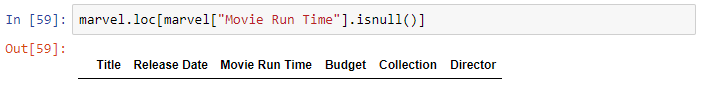

The table returned with only the headers, no rows. This means there are no rows with null values. Let's check the count of null values again.
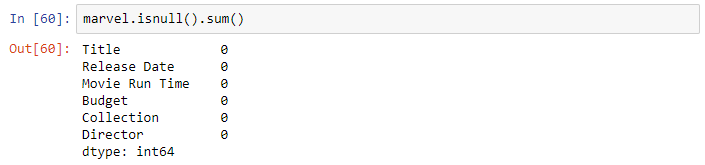

Brilliant! And one more count on the total rows in the dataset. We had 23 rows before, now we should have 22.
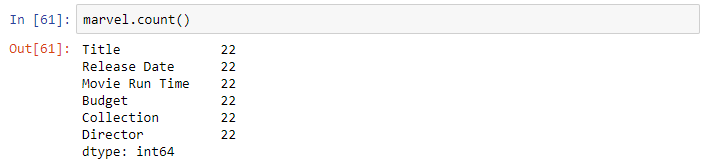

[Return to Table of Contents](#sections)

###  <font color=navy>9. Replacing Values based on other Columns </font>
<a id = 'replace_values'></a>
***
Earlier we replaced null values in the "Budget" and "Collection" columns with 0. We should check to see how many rows are equal to 0.
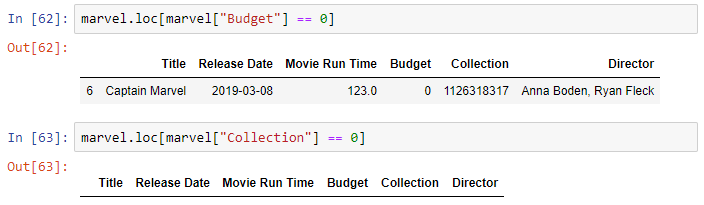

We have one row with 0 in the Budget, but with value in the Collection column. We should investigate and get a value for the Budget.

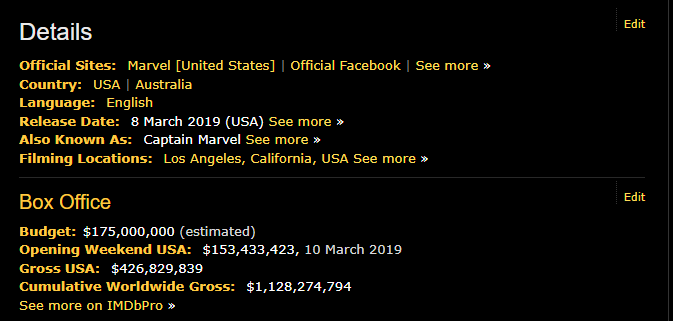

The Budget was $175,000,000. Great! We have the number, let's insert it into our data. We will use <font color=green>__.loc__ </font>to indicate the specific location we want to change the value. This one indexes by row then column.
The first part expresses the row to find instead of using an index value (Title = "Captain Marvel")
The second part expresses the column value to change.
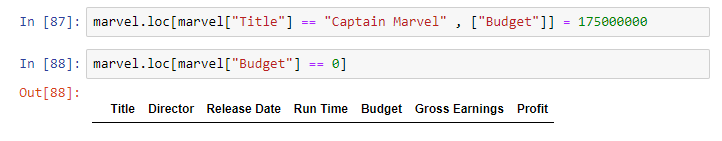

[Return to Table of Contents](#sections)

###  <font color=navy>10. Rename Columns </font>
<a id = 'rename_columns'></a>
***
Now that we have cleaned up the data and removed the extra columns, let's rename some of the columns to have more user-friendly names.
 * rename "Movie Run Time" to "Run Time"
 * rename "Collection" to "Gross Earnings"  
 
We will use a dictionary create sets of _OriginalColumn_ __:__ _NewColumn_  
 
<font color=green>__inplace=True__ </font> is specifying to replace the original names instead of returning a copy with new names.

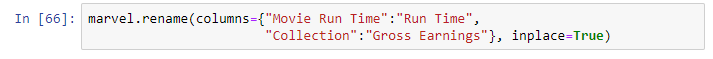

Now let's take a look at the dataset.
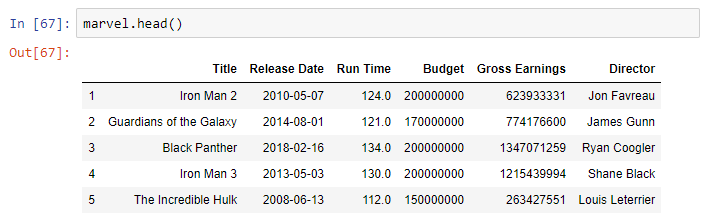

[Return to Table of Contents](#sections)

###  <font color=navy>11. Reorder the Columns </font>
<a id = 'reorder_columns'></a>
***
It's a little awkward having the Director at the end of the table. Moving it to the right of the Title would make it easier to read.

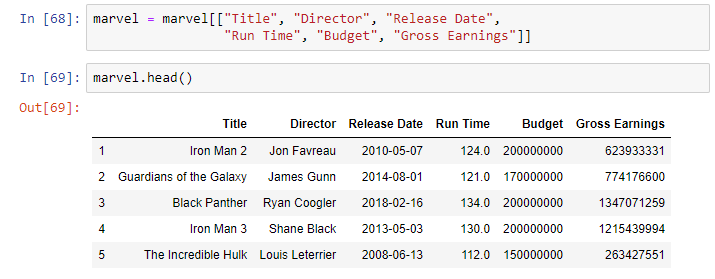

[Return to Table of Contents](#sections)

###  <font color=navy>12. Create a Calculated Column </font>
<a id = 'create_calculated'></a>
***
Using the Budget and Gross Earnings columns, we can calculate the profit for each move. 
> Profit = Gross Earnings - Budget

We assign the results to a new column called Profit.
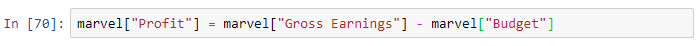

Pull up the top 5 columns.
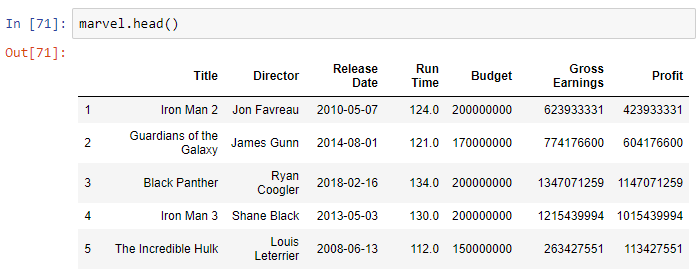

Pull up the description.
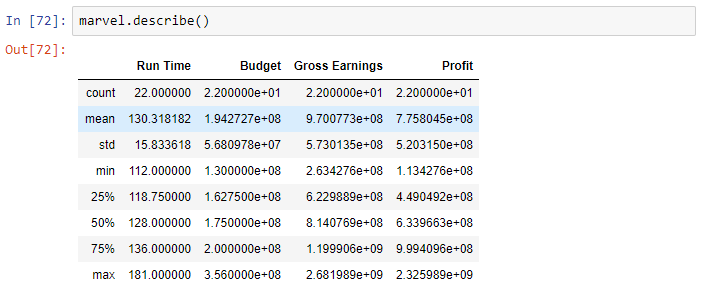

And finally, pull up the info.
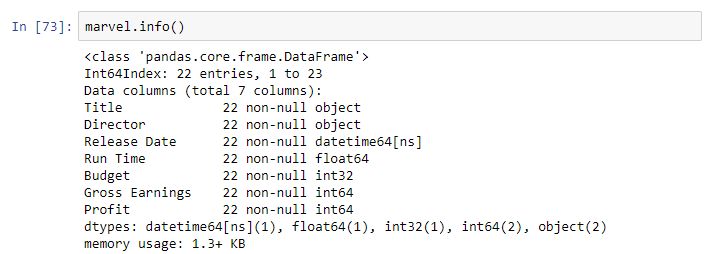

[Return to Table of Contents](#sections)

###  <font color=navy>13. Converting Date to Year</font>
<a id = 'convert_date'></a>
***
For the purpose of our analysis, let's convert the full date to just the year. We will overwrite the "Release Date" with this new info.

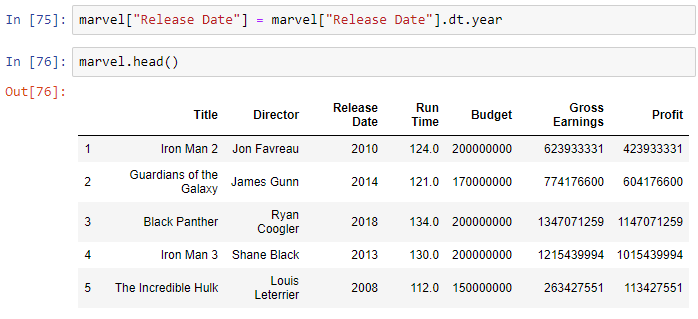

[Return to Table of Contents](#sections)

###  <font color=navy>14. Sorting Data</font>
<a id = 'sort_data'></a>
***
Whenever we analyis data with a time series, we always want the dates sorted. Let's sort the data by Release Date in ascending order.
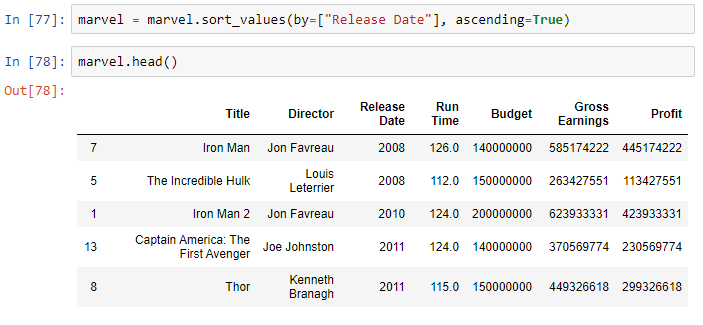

You can sort by multiple columns and in ascending or descending order. This is only a view (we didn't assign it to our dataframe or set inplace=True).
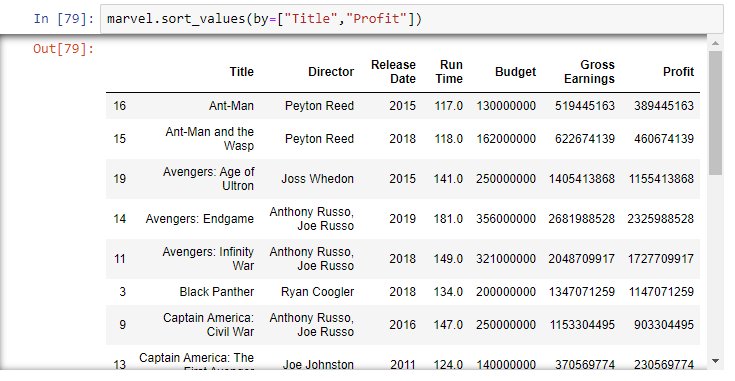

[Return to Table of Contents](#sections)

###  <font color=navy>15. Filter rows to make a new dataset</font>
<a id = 'create_new'></a>
***
Say we want to make a smaller dataset out of just the Avenger movies. We will create a new dataframe called "avengers" and filter the data from the marvel dataframe for rows where the title contains "Avengers".

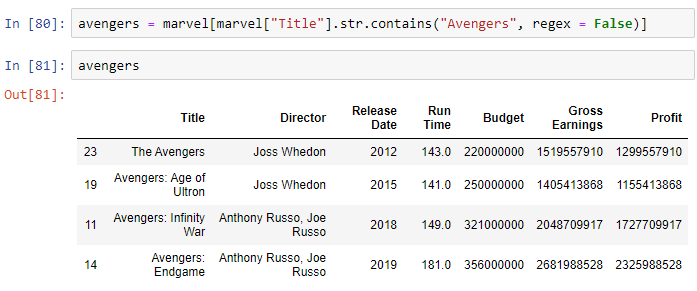

[Return to Table of Contents](#sections)

###  <font color=navy>16. Create Plots to Check the Data</font>
<a id = 'create_plots'></a>
***
Now that our data is nice and clean, we can add some visuals.
First, a boxplot for Profit.
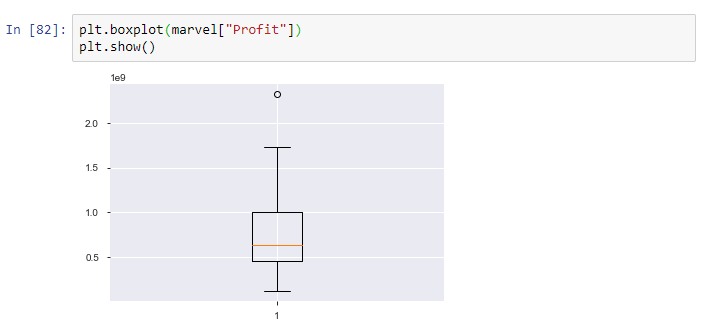

Then a scatter plot for Profit by Year.
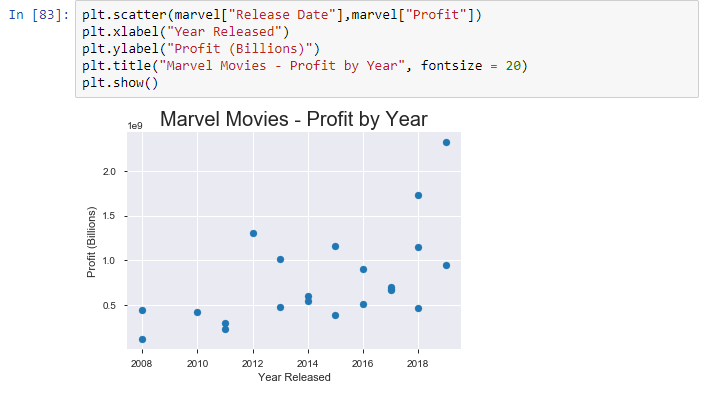

[Return to Table of Contents](#sections)

###  <font color=navy>17. Summarize with Pandas Profiling</font>
<a id = 'pandas_profile'></a>
***
The pandas_profiling package has a useful function called "ProfileReport" that will generate a summary of the information in the dataframe.

> This takes a few seconds to generate.

In [ ]:
marvel.profile_report()